<a href="https://colab.research.google.com/github/angelesGladin/Sistemasolar/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**♨️ TELECOM X - PARTE 2: PREDICCIÓN DE CANCELACIÓN (Churn)**

---
Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.


##📊 ANÁLISIS DE LOS DATOS

In [2]:
import pandas as  pd
import warnings
warnings.filterwarnings('ignore')

datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40,2.796667


###Análisis exploratorio inicial

In [3]:
print("Shape:", datos.shape)
print("\nTipos de datos:")
print(datos.info())
print("\nEstadísticas Variables númericas:")
display(datos.describe())
print("\nEstadísticas variables categóricas:")
display(datos.describe(include='O'))

Shape: (7256, 22)

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_st

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333



Estadísticas variables categóricas:


,id_cliente,genero,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,metodo_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,month to month,electronic check
freq,1,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


**OBSERVACINES:**



---



+ El dataset es completo y está bien estructurado, sin valores faltantes ni problemas de tipo de datos.

+ Existe un desbalance en la variable de respuesta (abandono), por lo que se usaran ajuste de pesos en los modelos.

+ Se observa una posible relación entre tipo de contrato y abandono, que puede ser clave en el modelado.

+ Las variables categóricas como tipo_internet, metodo_pago y los servicios contratados ofrecen información valiosa para identificar patrones de cancelación.

+ Será eliminada la variable id_cliente y luego proceder con la codificación de variables categóricas para continuar con el análisis correlacional y la construcción del modelo.


###Distribución de la variable de respuesta (abandono)

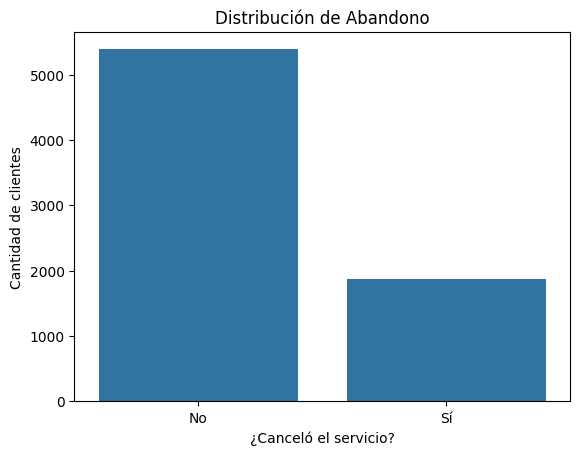

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(data=datos, x='abandono')
plt.title('Distribución de Abandono')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

**OBSERVACIONES**


---



+ Se visualiza claramente el desbalance de clases: la mayoría de los clientes no han cancelado. Esto puede influir en los modelos, por lo que será necesario realizar un balence en nuestros datos.

###Histograma de variables númericas

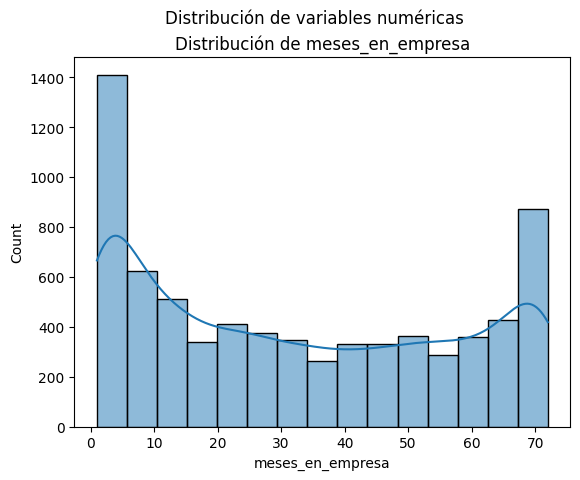

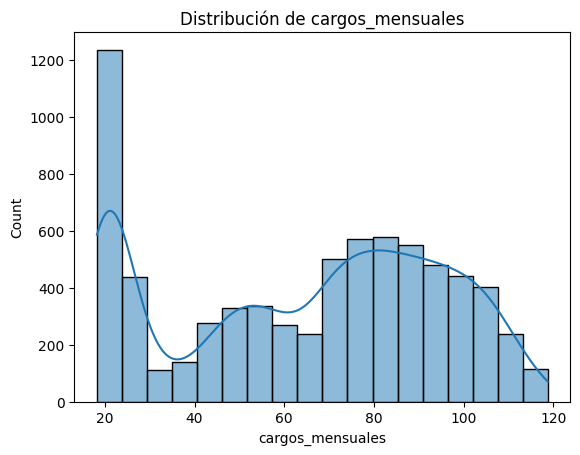

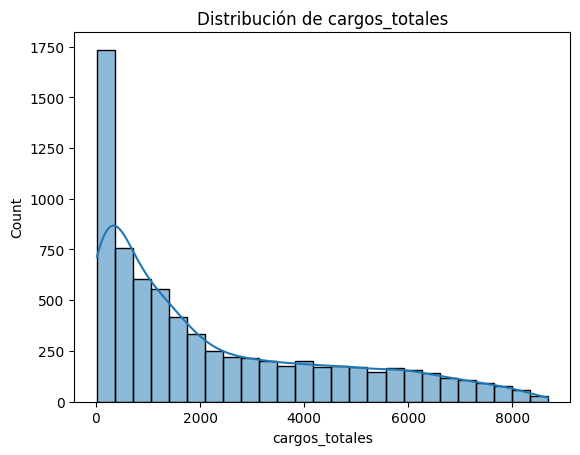

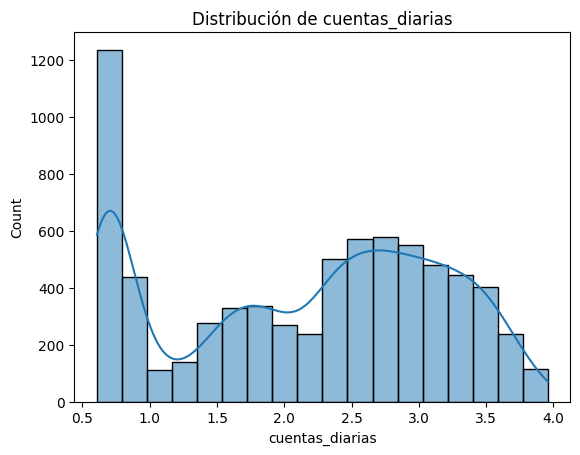

In [5]:
##recreando la formula diacoins

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2*iqr*np.power(len(df[columna]), -1/3)
  return ancho

numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
plt.suptitle('Distribución de variables numéricas')

for col in numericas:
  binwidth = ancho_bin(datos, col)
  sns.histplot(data=datos,x=col,kde=True, binwidth=binwidth)
  plt.title(f'Distribución de {col}')
  plt.show()

**OBSERVACIONES**



---



+ meses_en_empresa: mayor densidad en clientes recientes (pico en los primeros meses).

+ cargos_totales: distribución sesgada a la derecha, algunos clientes acumulan muchos cargos.

+ cuentas_diarias y cuentas_mensuales: parece tener un rango limitado, útil para normalizar después, a demás ambos gráficos muestra una gran similitud por lo que puede sesgar el modelo.

###Boxplots: Variables numéricas vs Abandono

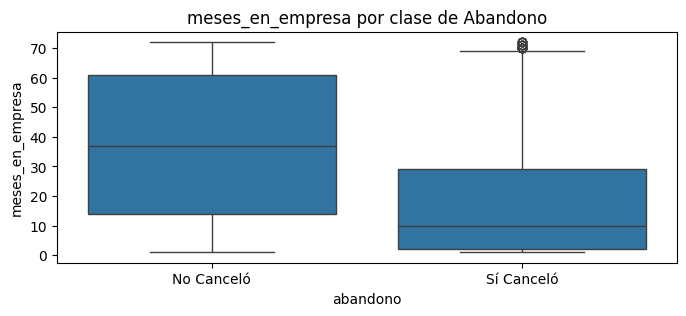

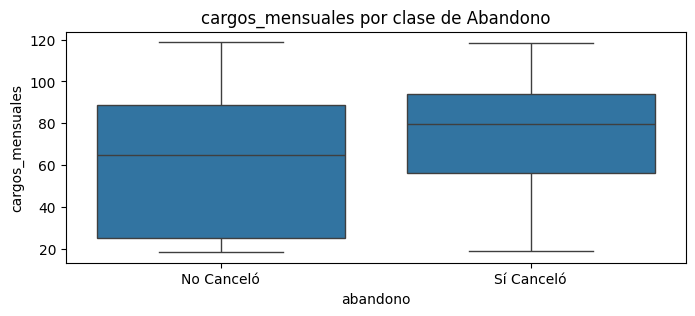

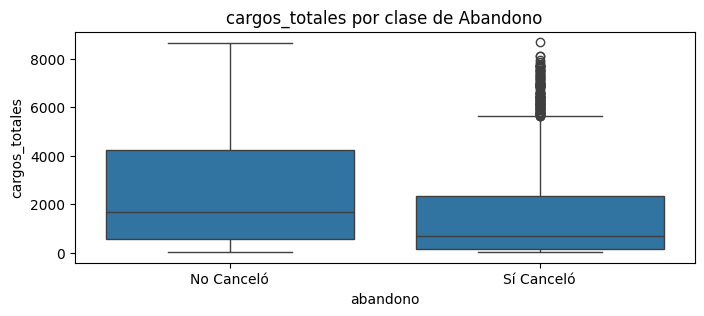

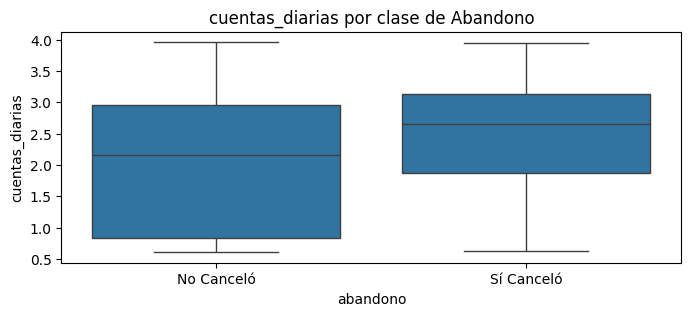

In [6]:
for col in numericas:
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=datos, x='abandono', y=col)
    plt.title(f'{col} por clase de Abandono')
    plt.xticks([0, 1], ['No Canceló', 'Sí Canceló'])
    plt.show()

**OBSERVACIONES**


---


+ Clientes que cancelan tienen significativamente menos tiempo en la empresa.

+ cargos_totales y meses_en_empresa están ligados a la permanencia, por lo tanto son importantes para detectar abandono.

+ meses_en_empresa, cargos_mensuales y cargos_totales tienen mayor importancia y deben ser normalizadas.

###Gráficos de barras: Categóricas vs Abandono

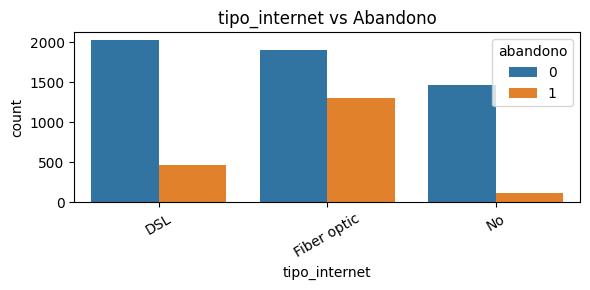

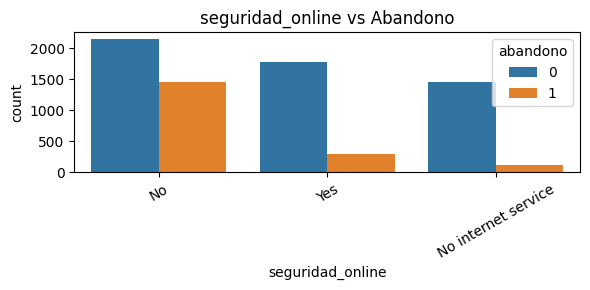

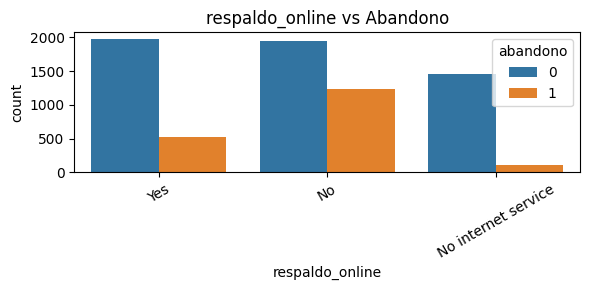

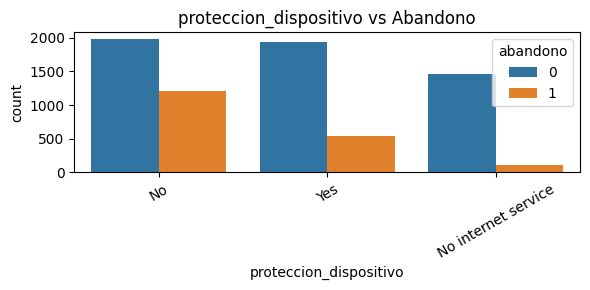

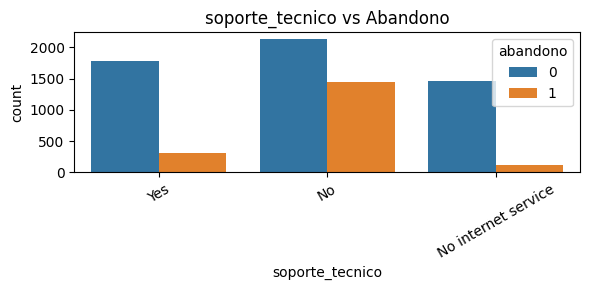

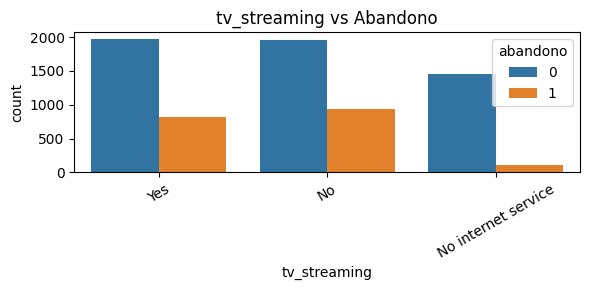

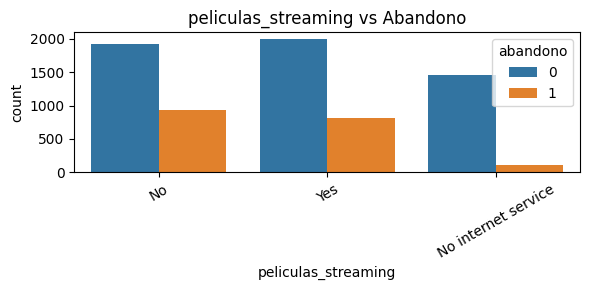

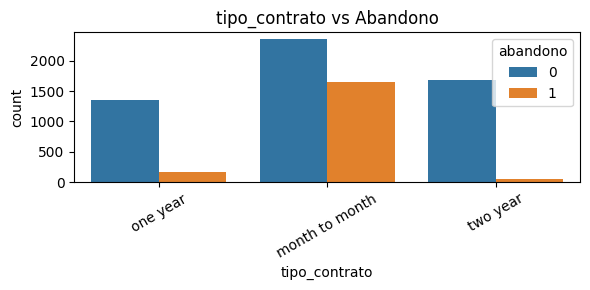

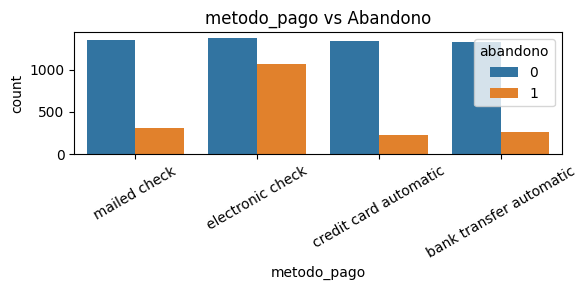

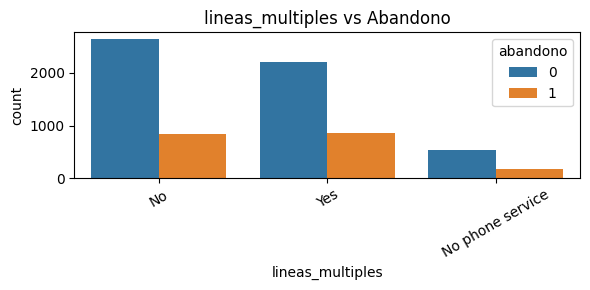

In [7]:
categoricas = ['tipo_internet', 'seguridad_online', 'respaldo_online',
               'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming',
               'peliculas_streaming', 'tipo_contrato', 'metodo_pago',
               'lineas_multiples']
for col in categoricas:
    plt.figure(figsize=(6,3))
    sns.countplot(data=datos, x=col, hue='abandono')
    plt.title(f'{col} vs Abandono')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

**OBSERVACIONES**



---



+ Variables altamente correlacionadas con abandono:

tipo_contrato:
Los clientes con contrato "month to month" tienen una tasa de abandono notablemente mayor.

metodo_pago:
"Electronic check" tiene mayor abandono que pagos automáticos.

soporte_tecnico, tv_streaming, seguridad_online:
Clientes que no tienen estos servicios tienden más al abandono.



---



+ Variables con poca influencia visual:

genero:
 No hay diferencia significativa entre hombres y mujeres.

es_ciudadano_senior:
 Ligera diferencia, pero no muy marcada.

tiene_dependientes y tiene_pareja:
Patrones no evidentes.

servicio_telefonico:
Casi todos tienen, no aporta variabilidad.


##🛠️ PREPARACIÓN DE LOS DATOS

###Eliminación de Columnas con identificador único

In [8]:
datos = datos.drop('id_cliente', axis=1)
datos.sample(2)

,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
3709,1,Male,1,0,0,25,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,month to month,0,mailed check,105.95,2655.25,3.531667
6336,0,Female,0,1,1,10,1,Yes,Fiber optic,No,...,No,No,No,Yes,month to month,0,electronic check,85.95,858.60,2.865000


###Codificación de las variables

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   es_ciudadano_senior     7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_en_empresa        7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   lineas_multiples        7256 non-null   object 
 8   tipo_internet           7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  tv_streaming            7256 non-null   object 
 14  peliculas_streaming     7256 non-null   

**OBSERVACIONES**


---


Se observan variables que tienen cadenas de string (str) por lo que se debe modificar para que sea compatibles con nuestros modelos de ML.

In [10]:
#codificación de la variable binaria faltante
datos['genero'] = datos['genero'].replace({'Male':0,'Female':1})
datos['genero'].sample(2)

,genero
7102,1
6918,1


In [11]:
#codificación de las variables categóricas
datos_codi = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codi.sample(2)

,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,...,tipo_contrato_month to month,tipo_contrato_one year,tipo_contrato_two year,metodo_pago_bank transfer automatic,metodo_pago_credit card automatic,metodo_pago_electronic check,metodo_pago_mailed check,lineas_multiples_No,lineas_multiples_No phone service,lineas_multiples_Yes
1928,0,1,0,1,1,72,1,1,84.2,5986.55,...,0,0,1,1,0,0,0,0,0,1
569,0,1,0,1,0,42,1,1,99.0,4135.00,...,0,0,1,0,1,0,0,1,0,0


**OBSERVACIONES**


---



Utilizamos un método de pandas que nos permite codificar nuestras variables con ceros y unos de forma numérica: get_dummies. Usaremos pd.get_dummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categóricas) y el tipo de dato (dtype) que será entero.

###Validación de la codificación de los datos

In [12]:
datos_codi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   abandono                                    7256 non-null   int64  
 1   genero                                      7256 non-null   int64  
 2   es_ciudadano_senior                         7256 non-null   int64  
 3   tiene_pareja                                7256 non-null   int64  
 4   tiene_dependientes                          7256 non-null   int64  
 5   meses_en_empresa                            7256 non-null   int64  
 6   servicio_telefonico                         7256 non-null   int64  
 7   factura_electronica                         7256 non-null   int64  
 8   cargos_mensuales                            7256 non-null   float64
 9   cargos_totales                              7256 non-null   float64
 10  cuentas_diar

**OBSERVACIONES**


---


En esta validación podemos observar que los datos que se encontraban con cadena de string (object) han cambiado a formato de entero (int), también se logra observar que ha crecido el número de columnas obtenidas.

## 📊PRIMER ANÁLISIS DE CORRELACIONES

In [13]:
correlation = datos_codi.corr()['abandono'].sort_values(ascending=False)
print(correlation)

abandono                                      1.000000
tipo_contrato_month to month                  0.395067
seguridad_online_No                           0.335271
soporte_tecnico_No                            0.330060
tipo_internet_Fiber optic                     0.300416
metodo_pago_electronic check                  0.294181
respaldo_online_No                            0.262721
proteccion_dispositivo_No                     0.246512
cuentas_diarias                               0.189393
cargos_mensuales                              0.189393
factura_electronica                           0.186309
es_ciudadano_senior                           0.146400
peliculas_streaming_No                        0.128793
tv_streaming_No                               0.126338
tv_streaming_Yes                              0.062456
peliculas_streaming_Yes                       0.060092
lineas_multiples_Yes                          0.039277
servicio_telefonico                           0.012337
genero    

**OBSERVACIONES**

Este análisis nos servirá para tener un punto de comparación con el siguiente analisis de correlaciones que será realizado despues del balanceo y la normalización.

---



+ Variables Positivamente Correlacionadas con Abandono

| Variable                          | Correlación | Interpretación                                                                                      |
|----------------------------------|-------------|------------------------------------------------------------------------------------------------------|
| tipo_contrato_month to month     | 0.395       | Contratos mensuales están fuertemente ligados a cancelaciones. Clientes sin compromiso se van más. |
| seguridad_online_No              | 0.335       | No contratar seguridad online es un fuerte indicador de abandono.                                   |
| soporte_tecnico_No               | 0.330       | Clientes sin soporte técnico cancelan más. Puede reflejar insatisfacción o bajo engagement.         |
| tipo_internet_Fiber optic        | 0.300       | Clientes con fibra óptica podrían tener mayores expectativas o problemas técnicos no resueltos.     |
| metodo_pago_electronic check     | 0.294       | Pagos con cheque electrónico se asocian a más cancelaciones. Menor automatización/lealtad.          |
| respaldo_online_No               | 0.263       | No tener respaldo online indica menor interés en servicios adicionales, asociado a abandono.        |
| proteccion_dispositivo_No        | 0.247       | Similar al anterior. Menor contratación de servicios adicionales implica menor satisfacción.        |



---
+ Variables Negativamente Correlacionadas con Abandono

| Variable                                                       | Correlación         | Interpretación                                                                                   |
|----------------------------------------------------------------|---------------------|--------------------------------------------------------------------------------------------------|
| meses_en_empresa                                               | -0.345              | Clientes con más tiempo en la empresa tienden a quedarse. Variable muy predictiva.              |
| tipo_contrato_two year                                         | -0.294              | Contratos largos retienen mejor. Refuerza la importancia del tipo de contrato.                  |
| cargos_totales                                                 | -0.194              | Clientes que han pagado más tienden a quedarse. Se vincula a la antigüedad.                     |
| metodo_pago_credit card automatic, bank transfer automatic     | ~-0.13 a -0.11      | Pagos automáticos se asocian a mayor permanencia. Mayor compromiso y menor esfuerzo.            |
| seguridad_online_Yes, soporte_tecnico_Yes, proteccion_dispositivo_Yes, etc. | ~-0.16 a -0.06 | Contar con servicios adicionales se asocia a menor churn. Mayor engagement del cliente.         |




##🔃 SEPARACIÓN DE VARIABLES DE RESPUESTA Y EXPLICATIVAS

In [15]:
#variables explicativas
X = datos_codi.drop('abandono', axis=1)

#variable de respuesta
y = datos_codi['abandono']

**OBSERVACIONES**


---
+ X: contiene solo las features explicativas (sin la variable objetivo).

+ y: contiene la variable objetivo (abandono), que se estará usando para el entrenamiento y evaluación.

##⚖️ BALANCEO DE CLASES CON SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#aplicando SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(X,y)

#verificar nuevo balance

print('Distribución original de clases:', Counter(y))
print('Distribución después de SMOTE:', Counter(y_res))

Distribución original de clases: Counter({0: 5387, 1: 1869})
Distribución después de SMOTE: Counter({0: 5387, 1: 5387})


**OBSERVACIONES**


---

+ Antes de SMOTE, la clase 0 (clientes que no abandonaron) fue mucho mayor que la 1.

+ Después de aplicar SMOTE, ambas clases (0 y 1) se muestran balanceadas, con la misma cantidad de observaciones.

+ Con esto evitamos que el modelo aprenda solo a predecir la clase mayoritaria y mejora la sensibilidad (recall) en la clase minoritaria (los que sí abandonan).

## 📏 NORMALIZACIÓN CON StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

#inicializar
scaler = StandardScaler()

#Aplicar el escalado a los datos balanceados
X_scaled = scaler.fit_transform(x_res)

**OBSERVACIONES**



---
+ Cada variable númerica tendrá media 0 y desviación estándar 1
+ La normalización es una buena practica ya que da flexibilidad para probarse en diversos algoritmos
